In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/nga-east_rotd50_5pct_flatfile_public_20141118.csv')

Mounted at /content/drive


<ipython-input-3-cfaed53d8f5c>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/nga-east_rotd50_5pct_flatfile_public_20141118.csv')


In [ ]:
df = df.drop_duplicates()
df = df.drop(df[df['Joyner-Boore Dist. (km)'] == -999 ].index)
df = df.drop(df[df['Joyner-Boore Dist. (km)'] > 1500 ].index)
df = df.drop(df[df['PGA-H RotDnn (g)'] == -999 ].index)
df = df.drop(df[df['HypD (km)'] <= 0 ].index)

In [ ]:
df.reset_index()

,index,Record Sequence Number,EQID,Earthquake Name,Earthquake Location,Year,Month,Day,Hour,Minute,...,T8.511363s,T8.709663s,T8.912497s,T9s,T9.120093s,T9.332537s,T9.5s,T9.549913s,T9.772401s,T10s
0,0,42,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,...,3.371480e-04,3.214520e-04,3.055400e-04,2.988270e-04,2.896760e-04,2.737270e-04,2.631590e-04,2.601610e-04,2.482690e-04,2.365760e-04
1,1,43,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,...,7.981870e-05,7.618600e-05,7.271660e-05,7.126930e-05,6.938110e-05,6.621790e-05,6.387290e-05,6.319790e-05,6.031420e-05,5.756260e-05
2,2,49,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,...,1.613400e-04,1.537930e-04,1.466720e-04,1.437700e-04,1.399400e-04,1.335270e-04,1.288400e-04,1.274950e-04,1.217690e-04,1.163280e-04
3,3,51,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,...,1.462360e-04,1.395990e-04,1.332670e-04,1.306680e-04,1.272240e-04,1.214550e-04,1.171800e-04,1.159490e-04,1.106930e-04,1.056780e-04
4,4,52,5,Saguenay_1988-11-25,Saguenay QC,1988,11,25,23,46,...,1.113560e-04,1.049390e-04,9.863450e-05,9.589730e-05,9.246470e-05,8.669810e-05,8.277760e-05,8.168850e-05,7.717850e-05,7.334710e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,9377,12062,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,...,8.933050e-08,8.531680e-08,8.146960e-08,7.988330e-08,7.777390e-08,7.422510e-08,7.158480e-08,7.082370e-08,6.757090e-08,6.447040e-08
8079,9378,12063,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,...,1.458760e-07,1.392980e-07,1.330240e-07,1.304630e-07,1.270800e-07,1.214380e-07,1.172640e-07,1.160620e-07,1.109160e-07,1.059250e-07
8080,9379,12064,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,...,9.040710e-08,8.641220e-08,8.256080e-08,8.097280e-08,7.885820e-08,7.529330e-08,7.263440e-08,7.186690e-08,6.858680e-08,6.544350e-08
8081,9380,12065,117,Saguenay_1988-11-26,Saguenay,1988,11,26,3,38,...,1.289430e-07,1.231820e-07,1.176900e-07,1.154530e-07,1.125070e-07,1.075390e-07,1.038150e-07,1.027360e-07,9.808450e-08,9.359120e-08


In [ ]:
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])

y = pd.DataFrame()
y['log PGA'] = np.log10(df['PGA-H RotDnn (g)'])
y['log PGV'] = np.log10(df['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    y[f"log PSA {i}s"] = np.log10(df[f"T{i}s"])

X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]


In [ ]:
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

In [ ]:
n_samples, n_feature = X.shape
n_s, n_labels = y.shape

print(n_samples, n_feature)
print(n_s, n_labels)

batch_size = 32

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state=21)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(y_test)

X_train = torch.tensor(X_train.astype(np.float32).values)
X_test = torch.tensor(X_test.astype(np.float32).values)
y_train = torch.tensor(y_train.astype(np.float32).values)
y_test = torch.tensor(y_test.astype(np.float32).values)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
# y_train = y_train.view(y_train.shape[0],1)
# y_test = y_test.view(y_test.shape[0],1)

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

8083 5
8083 25


In [ ]:
print(type(X_train))

<class 'torch.Tensor'>


In [ ]:
class ANN(nn.Module):
  def __init__(self,n_input_featurs, hidden_layer, n_output_labels):
    super(ANN, self).__init__()
    self.linear1 = nn.Linear(n_input_featurs, hidden_layer)
    self.linear2 = nn.Linear(hidden_layer, n_output_labels)

  def forward(self, x):
    out = F.relu(self.linear1(x))
    out = self.linear2(out)
    return out

model_ANN = ANN(n_feature, n_feature+2, n_labels)



In [ ]:
def accuracy(loader, model):
  criterion = nn.MSELoss()
  mse = 0
  model.eval()

  with torch.no_grad():
    for input, output in loader:
      pred = model(input)
      loss = criterion(pred, output)
      mse += loss

    print(f'Total Loss: {mse:.4f}, Average MSE: {(mse)/len(loader):.4f}')



In [ ]:
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_ANN.parameters(), lr = learning_rate)

In [ ]:
n_epochs = 100

for epoch in range(n_epochs):
  for i, data in enumerate(train_loader):
    input, output = data
    y_pred = model_ANN(input)
    loss = criterion(y_pred, output)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if (i+1)%100 == 0:
      print(f'epoch: {epoch+1}/{n_epochs}, step:{i+1}/{len(train_loader)} loss: {loss.item():.4f}')

epoch: 1/100, step:100/215 loss: 1.1923
epoch: 1/100, step:200/215 loss: 1.0520
epoch: 2/100, step:100/215 loss: 0.3711
epoch: 2/100, step:200/215 loss: 0.3967
epoch: 3/100, step:100/215 loss: 0.2372
epoch: 3/100, step:200/215 loss: 0.1610
epoch: 4/100, step:100/215 loss: 0.1376
epoch: 4/100, step:200/215 loss: 0.2135
epoch: 5/100, step:100/215 loss: 0.1390
epoch: 5/100, step:200/215 loss: 0.1409
epoch: 6/100, step:100/215 loss: 0.0974
epoch: 6/100, step:200/215 loss: 0.2352
epoch: 7/100, step:100/215 loss: 0.2126
epoch: 7/100, step:200/215 loss: 0.1116
epoch: 8/100, step:100/215 loss: 0.1477
epoch: 8/100, step:200/215 loss: 0.1682
epoch: 9/100, step:100/215 loss: 0.1596
epoch: 9/100, step:200/215 loss: 0.1832
epoch: 10/100, step:100/215 loss: 0.2370
epoch: 10/100, step:200/215 loss: 0.1221
epoch: 11/100, step:100/215 loss: 0.1511
epoch: 11/100, step:200/215 loss: 0.1681
epoch: 12/100, step:100/215 loss: 0.1822
epoch: 12/100, step:200/215 loss: 0.2301
epoch: 13/100, step:100/215 loss: 

In [ ]:
accuracy(train_loader, model_ANN)
accuracy(test_loader, model_ANN)

Total Loss: 35.6109, Average MSE: 0.1656
Total Loss: 6.1379, Average MSE: 0.1615


In [ ]:
X_test.shape

torch.Size([1213, 5])

In [ ]:
model_ANN.eval()
y_pred = model_ANN(X_test)
# y_pred_c = [f"log PSA {i}s" for i in t]
# y_pred_c.append("log PGA")
# y_pred_c.append("log PGV")
# y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

In [ ]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [ ]:
y_pred[:,0].shape

(1213,)

In [ ]:
y_test.shape

(1213, 25)

In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score for the first dataframe

r2_score_1 = r2_score(y_pred[:,0], y_test[:,0])


print("R^2 score for dataframe 1:", r2_score_1)


R^2 score for dataframe 1: 0.8123251758341625


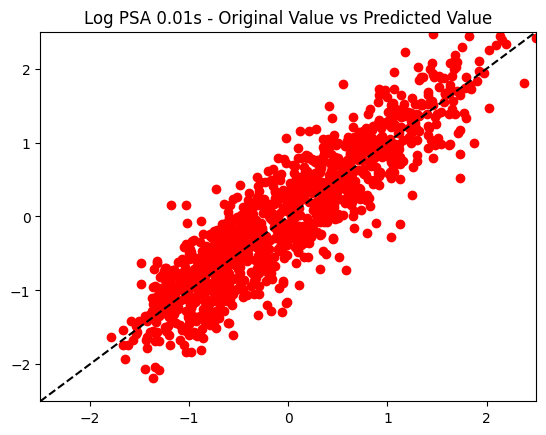

In [ ]:
plt.scatter(y_pred[:,0], y_test[:,0], color = 'r')
x = np.linspace(-2.5, 2.5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.title('Log PSA 0.01s - Original Value vs Predicted Value')
# plt.legend()
plt.show()